(50, 2) (50, 1)
(50, 2)
(5200, 1)


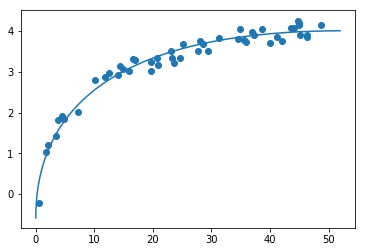

In [2]:
import sklearn.datasets
from sklearn.linear_model import LinearRegression

# a = sklearn.datasets.make_friedman1(n_samples=50, n_features=5, noise=0.5, random_state=None)
# a = sklearn.datasets.make_friedman1(n_samples=50, n_features=1, n_informative=1, n_targets=1, bias=1.0, effective_rank=None, tail_strength=0.5, noise=0.5, shuffle=True, coef=False, random_state=None)

import numpy as np
import numpy.random
import math


def generator_1d(f, range=1, n_samples=100, noise=0.1):
    x = np.random.rand(n_samples) * range
    vec = np.vectorize(f)
    noise = np.random.rand(n_samples)*noise
    return (x, vec(x)+noise)


ds = generator_1d((lambda x: math.log(x)), 50, 50, 0.5)
#
# print(a)
#
import matplotlib.pyplot as plt

#
# plt.scatter(ds[0], ds[1])
# plt.show()

reg = LinearRegression()

X = ds[0].reshape(-1, 1)
POW = 3
for pow in range(2,POW):
    X_2 = X.copy()[:,0]**0.5
    X_2 = X_2.reshape(-1,1)
    X = np.hstack((X, X_2))
    print(X.shape,X_2.shape)


print(X.shape)

reg.fit(X, ds[1])

pred = reg.predict(X)

plt.scatter(X[:,0], ds[1])

t1 = np.arange(0.0, 52, 0.01)
t1 = t1.reshape(-1,1)
print(t1.shape)
for pow in range(2,POW):
    X_2 = t1.copy()[:,0]**0.5
    X_2 = X_2.reshape(-1,1)
    t1 = np.hstack((t1, X_2))


plt.plot(t1[:,0], reg.predict(t1))
# plt.scatter(X[:,0], pred)

from numpy import polyfit

# cof = polyfit(ds[0],ds[1], 2)
# plt.scatter(ds[0], np.poly1d(cof))



plt.show()


(10, 2)
(10,)


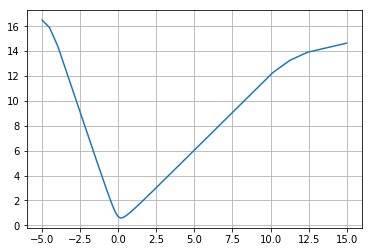

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

def line(x):
    return 0.7*x

def sigmoid(x):
    return 1./(1+math.exp(-x))

vec_sigmoid = np.vectorize(sigmoid)

def plot_func(fun):
    range = np.arange(-10,10,0.01)

    vec_fun = np.vectorize(fun)

    fig, ax = plt.subplots()
    ax.plot(range, vec_fun(range))
    ax.grid(True)
    plt.show()

# plot_func(line)
# plot_func(sigmoid)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss


X = np.array([[2.7810836, 2.550537003],[1.465489372, 2.362125076],[3.396561688, 4.400293529],[1.38807019, 1.850220317],[3.06407232, 3.005305973],[7.627531214, 2.759262235],[5.332441248,2.088626775],[6.922596716,1.77106367],[8.675418651,-0.2420686549],[7.673756466,3.508563011]])
y = np.array([0,0,0,0,0,1,1,1,1,1])

print(X.shape)
print(y.shape)


x = X[:,0]
W = np.arange(-5,15,0.01)


ans = []
for w in W:
    y_pred = vec_sigmoid(w*x)
#     print(y_pred)
    # ans.append(mean_squared_error(y,y_pred))
    ans.append(log_loss(y,y_pred))
fig, ax = plt.subplots()
ax.plot(W,ans)
ax.grid(True)
plt.show()

#mean_squared_error()

In [1]:
from linear_model import LinearRegression
from pprint import pprint
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

data = np.genfromtxt('train.csv', delimiter=',', skip_header=True)
data[:5]

X = data[:,0:11]
y = data[:,-1]
pprint(X[0])
pprint(y[0])

array([  4.9176,   1.    ,   3.472 ,   0.998 ,   1.    ,   7.    ,
         4.    ,  42.    ,   3.    ,   1.    ,   0.    ])
25.899999999999999


In [2]:
clf = LinearRegression()

In [3]:
clf.fit(X, y, verbose=False)

10.1290187794


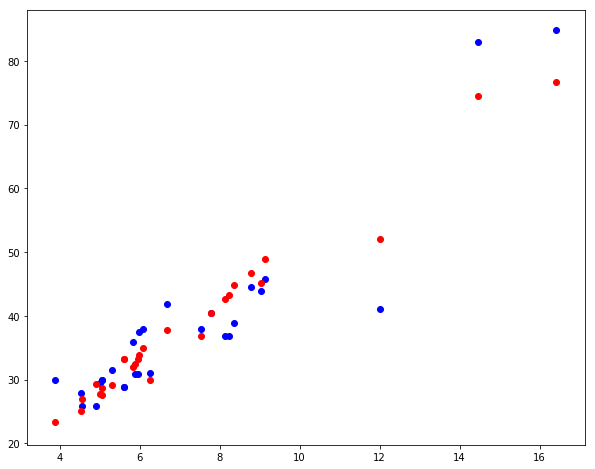

In [4]:
print(clf.cost(X, y))
clf.predict(X).shape
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], y,c='b')
plt.scatter(X[:,0], clf.predict(X), c='r')
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[2.7810836, 2.550537003],[1.465489372, 2.362125076],[3.396561688, 4.400293529],[1.38807019, 1.850220317],[3.06407232, 3.005305973],[7.627531214, 2.759262235],[5.332441248,2.088626775],[6.922596716,1.77106367],[8.675418651,-0.2420686549],[7.673756466,3.508563011]])
y = np.array([0,0,0,0,0,1,1,1,1,1])

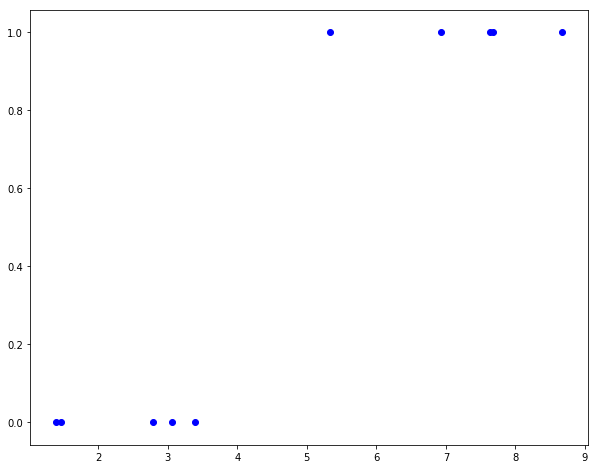

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], y,c='b')
# plt.scatter(X[:,0], clf.predict(X), c='r')
plt.show()

In [9]:
from exercise.linear_model import LogisticRegression

In [10]:
clf = LogisticRegression()
 

In [11]:
clf.fit(X,y,verbose=False)

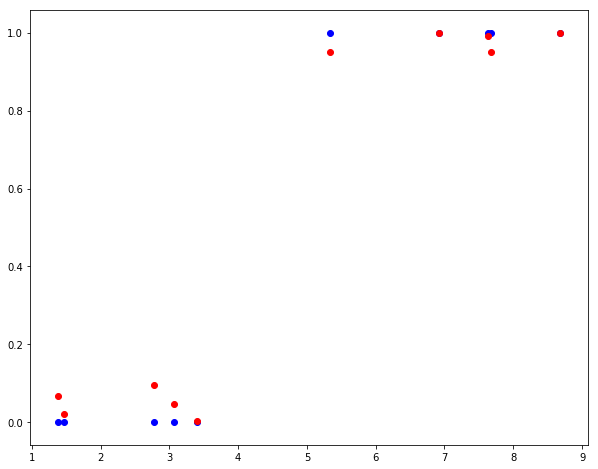

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], y,c='b')
plt.scatter(X[:,0], clf.predict(X), c='r')
plt.show()



In [16]:
nclasses = 3
pclass = [0,0,1,2,0,1,1]

In [17]:
np.eye(nclasses)[pclass]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.]])